In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
puneet6060_intel_image_classification_path = kagglehub.dataset_download('puneet6060/intel-image-classification')

print('Data source import complete.')


Using Colab cache for faster access to the 'intel-image-classification' dataset.
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 78.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 3.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.0 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import torch.nn as nn
import torch.optim as optim

# Load & Data Preparation

In [ ]:
train_base = "/kaggle/input/intel-image-classification/seg_train/seg_train"
test_base ="/kaggle/input/intel-image-classification/seg_test/seg_test"

In [ ]:
from PIL import Image
import pandas as pd

sizes = []
data = []
for class_name in os.listdir(train_base):
    class_path = os.path.join(train_base, class_name)
    for file in os.listdir(class_path):
        img_path = os.path.join(class_path, file)
        with Image.open(img_path) as img:
            width, height = img.size
            data.append({
                    "image_path": img_path,
                    "label": class_name,
                    "width": width,
                    "height": height
                })

df = pd.DataFrame(data)
print(df.describe())

         width        height
count  14034.0  14034.000000
mean     150.0    149.908722
std        0.0      1.873124
min      150.0     76.000000
25%      150.0    150.000000
50%      150.0    150.000000
75%      150.0    150.000000
max      150.0    150.000000


In [ ]:
class_counts = {cls: len(os.listdir(os.path.join(train_base, cls))) for cls in os.listdir(train_base)}

# Tampilkan hasil
for cls, count in class_counts.items():
    print(f"{cls:<10} : {count} images")

mountain   : 2512 images
street     : 2382 images
buildings  : 2191 images
sea        : 2274 images
forest     : 2271 images
glacier    : 2404 images


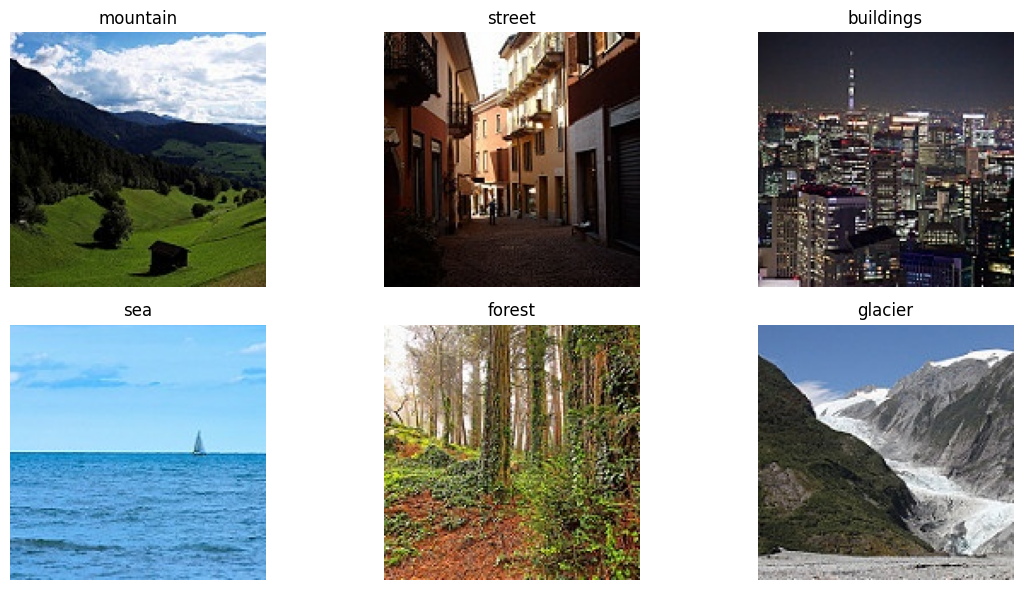

In [ ]:
import matplotlib.pyplot as plt
import random
from PIL import Image

plt.figure(figsize=(12,6))
for i, class_name in enumerate(os.listdir(train_base)):
    class_path = os.path.join(train_base, class_name)
    img_path = os.path.join(class_path, random.choice(os.listdir(class_path)))
    img = Image.open(img_path)
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
from PIL import Image

def clean_invalid_images(df):
    valid_idx = []
    for i, path in enumerate(df["image_path"]):
        try:
            with Image.open(path) as img:
                img.verify()
            valid_idx.append(i)
        except:
            pass
    return df.iloc[valid_idx].reset_index(drop=True)

df = clean_invalid_images(df)
print(f"Valid images: {len(df)}")

Valid images: 14034


# Exploratory Data Analysis

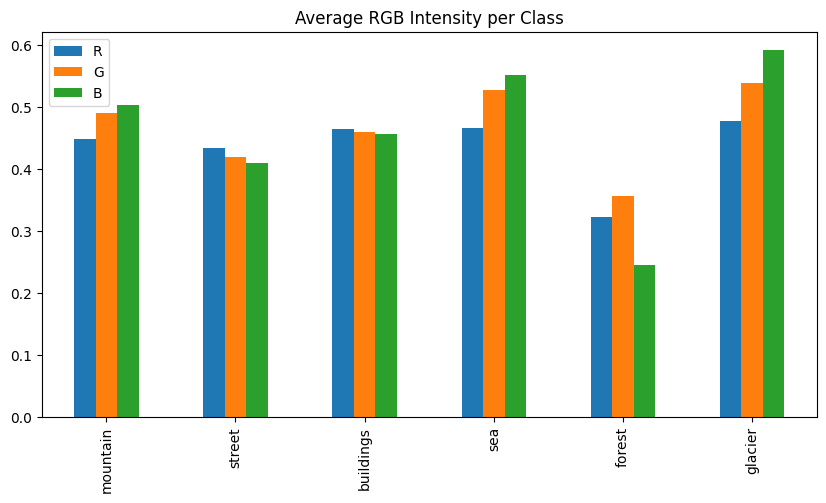

In [ ]:
import numpy as np
from PIL import Image

rgb_means = {}

for class_name in os.listdir(train_base):
    class_path = os.path.join(train_base, class_name)
    r_vals, g_vals, b_vals = [], [], []
    for file in os.listdir(class_path)[:50]:  # ambil sebagian sampel
        img = Image.open(os.path.join(class_path, file)).convert("RGB")
        arr = np.array(img) / 255.0
        r_vals.append(arr[:, :, 0].mean())
        g_vals.append(arr[:, :, 1].mean())
        b_vals.append(arr[:, :, 2].mean())
    rgb_means[class_name] = [np.mean(r_vals), np.mean(g_vals), np.mean(b_vals)]

# visualisasi
df_rgb = pd.DataFrame(rgb_means, index=["R", "G", "B"]).T
df_rgb.plot(kind="bar", figsize=(10,5))
plt.title("Average RGB Intensity per Class")
plt.show()



Processing mountain (2512 files):

Processing street (2382 files):

Processing buildings (2191 files):

Processing sea (2274 files):

Processing forest (2271 files):

Processing glacier (2404 files):


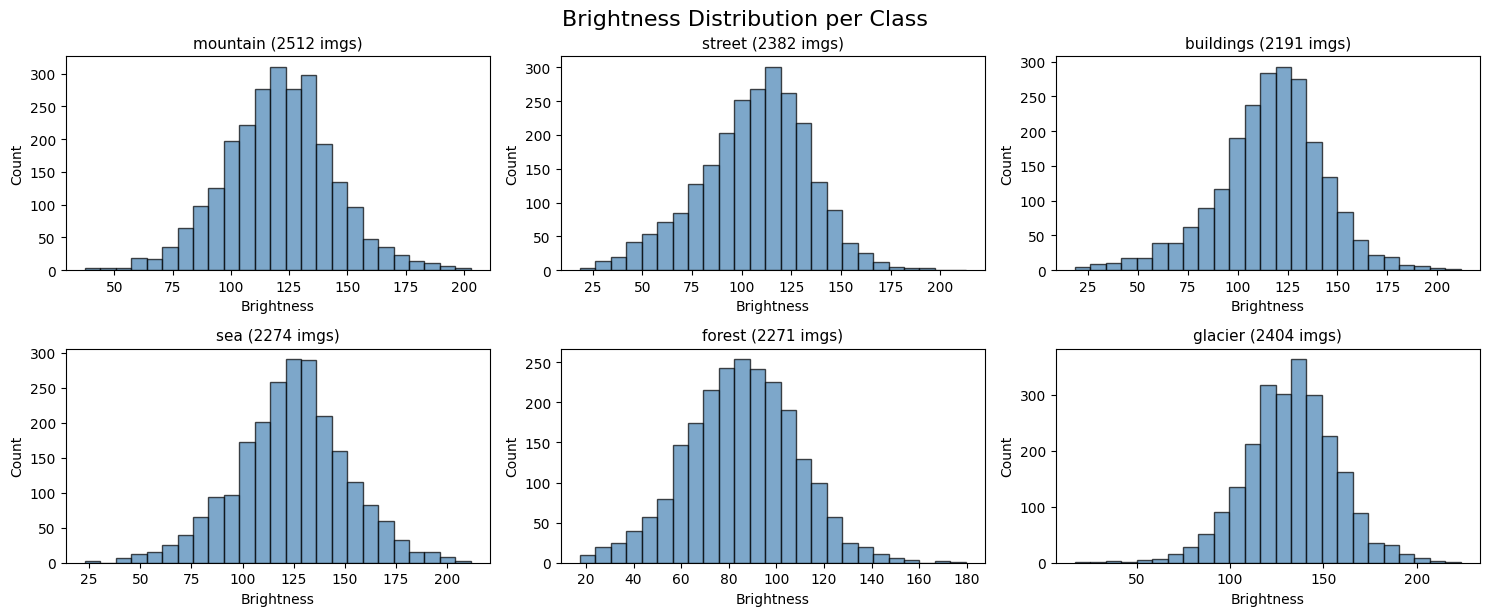

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image, ImageStat
from tqdm import tqdm


brightness_per_class = {}

# Loop per kelas
for class_name in os.listdir(train_base):
    class_path = os.path.join(train_base, class_name)
    if not os.path.isdir(class_path):
        continue

    files = os.listdir(class_path)
    n_files = len(files)
    brightness_values = []

    print(f"\nProcessing {class_name} ({n_files} files):")

    for idx, file in enumerate(files):
        img_path = os.path.join(class_path, file)
        try:
            img = Image.open(img_path).convert("L")  # convert to grayscale
            stat = ImageStat.Stat(img)
            brightness_values.append(stat.mean[0])
        except:
            continue


    brightness_per_class[class_name] = brightness_values

# --- Plot per class ---
n_classes = len(brightness_per_class)
cols = 3
rows = (n_classes + cols - 1) // cols

plt.figure(figsize=(15, rows * 3))

for i, (class_name, values) in enumerate(brightness_per_class.items(), 1):
    plt.subplot(rows, cols, i)
    plt.hist(values, bins=25, color="steelblue", edgecolor="black", alpha=0.7)
    plt.title(f"{class_name} ({len(values)} imgs)", fontsize=11)
    plt.xlabel("Brightness")
    plt.ylabel("Count")

plt.tight_layout()
plt.suptitle("Brightness Distribution per Class", fontsize=16, y=1.02)
plt.show()


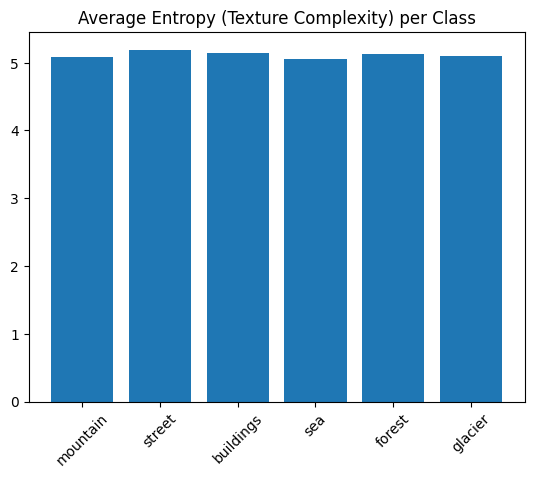

In [ ]:
from scipy.stats import entropy

entropies = {}
for class_name in os.listdir(train_base):
    class_path = os.path.join(train_base, class_name)
    vals = []
    for file in os.listdir(class_path):
        img = Image.open(os.path.join(class_path, file)).convert("L")
        hist = np.histogram(np.array(img).ravel(), bins=256, range=(0, 255))[0]
        vals.append(entropy(hist + 1e-6))
    entropies[class_name] = np.mean(vals)

plt.bar(entropies.keys(), entropies.values())
plt.xticks(rotation=45)
plt.title("Average Entropy (Texture Complexity) per Class")
plt.show()


100%|██████████| 6/6 [00:26<00:00,  4.47s/it]


       class      R_mean      G_mean      B_mean  Brightness   Entropy
0   mountain  112.180606  123.143159  129.932691  120.637932  7.325812
1     street  109.278280  105.802296  102.229948  106.434998  7.492358
2  buildings  114.832867  117.021692  118.269257  116.509228  7.420366
3        sea  116.863459  126.284577  130.942382  123.997080  7.299196
4     forest   83.750444   90.806873   61.844835   85.393896  7.403879
5    glacier  120.549306  135.609659  148.468431  132.570151  7.355704


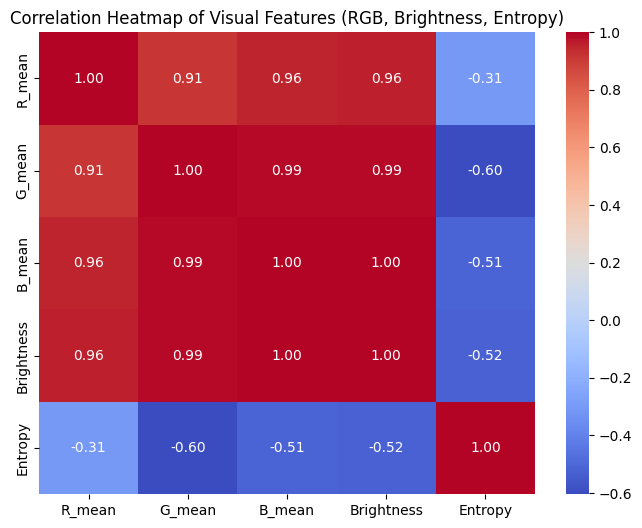

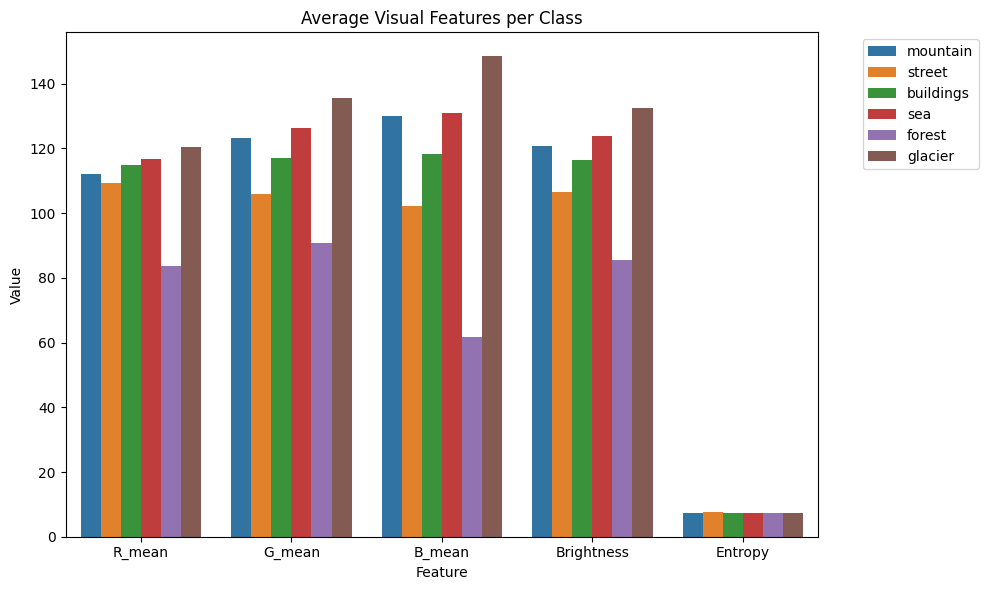

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image, ImageStat
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm


stats = []

for class_name in tqdm(os.listdir(train_base)):
    class_path = os.path.join(train_base, class_name)
    if not os.path.isdir(class_path):
        continue

    r_vals, g_vals, b_vals, brightness_vals, entropy_vals = [], [], [], [], []

    for file in os.listdir(class_path):
        img_path = os.path.join(class_path, file)
        try:
            img = Image.open(img_path).convert("RGB")
            stat = ImageStat.Stat(img)
            r, g, b = stat.mean
            r_vals.append(r)
            g_vals.append(g)
            b_vals.append(b)

            gray = img.convert("L")
            brightness_vals.append(ImageStat.Stat(gray).mean[0])

            # Hitung entropy
            hist = gray.histogram()
            hist = np.array(hist) / np.sum(hist)
            entropy = -np.sum(hist * np.log2(hist + 1e-9))
            entropy_vals.append(entropy)

        except:
            continue

    stats.append({
        "class": class_name,
        "R_mean": np.mean(r_vals),
        "G_mean": np.mean(g_vals),
        "B_mean": np.mean(b_vals),
        "Brightness": np.mean(brightness_vals),
        "Entropy": np.mean(entropy_vals)
    })

# --- DataFrame ---
df_stats = pd.DataFrame(stats)
print(df_stats)

# --- Korelasi antar fitur ---
corr = df_stats.drop(columns="class").corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Visual Features (RGB, Brightness, Entropy)")
plt.show()

# --- Barplot tiap fitur per kelas ---
plt.figure(figsize=(10,6))
df_melted = df_stats.melt(id_vars="class", var_name="Feature", value_name="Value")
sns.barplot(data=df_melted, x="Feature", y="Value", hue="class")
plt.title("Average Visual Features per Class")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
import torch
import torchvision.models as models
import torchvision.transforms as T
from PIL import Image
import numpy as np
from torch.utils.data import Dataset

# Pretrained model (tanpa FC layer)
model = models.resnet18(weights='IMAGENET1K_V1')
model = torch.nn.Sequential(*(list(model.children())[:-1]))
model.eval()

# Transform for input
transform = T.Compose([
    T.Resize((224, 224)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225])
])

# Collect features
features = []
labels = []

for class_name in os.listdir(train_base):
    class_path = os.path.join(train_base, class_name)
    for file in os.listdir(class_path):  # sampling
        img_path = os.path.join(class_path, file)
        img = Image.open(img_path).convert("RGB")
        x = transform(img).unsqueeze(0)
        with torch.no_grad():
            feat = model(x).flatten().numpy()
        features.append(feat)
        labels.append(class_name)


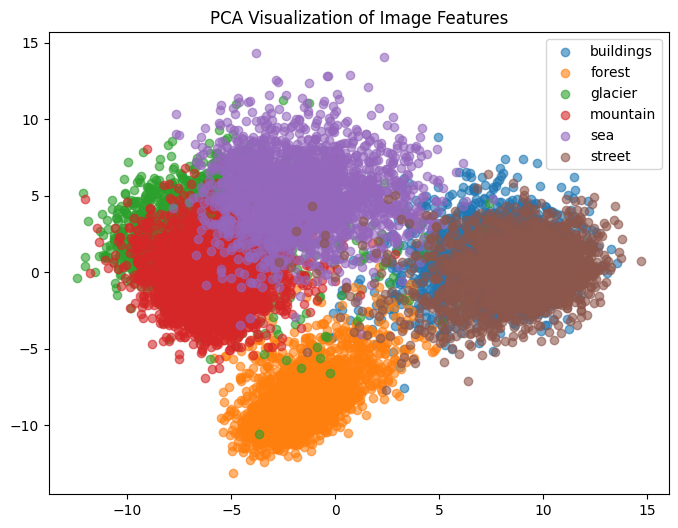

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(features)

plt.figure(figsize=(8,6))
for label in np.unique(labels):
    idx = np.array(labels) == label
    plt.scatter(X_pca[idx,0], X_pca[idx,1], label=label, alpha=0.6)
plt.legend()
plt.title("PCA Visualization of Image Features")
plt.show()


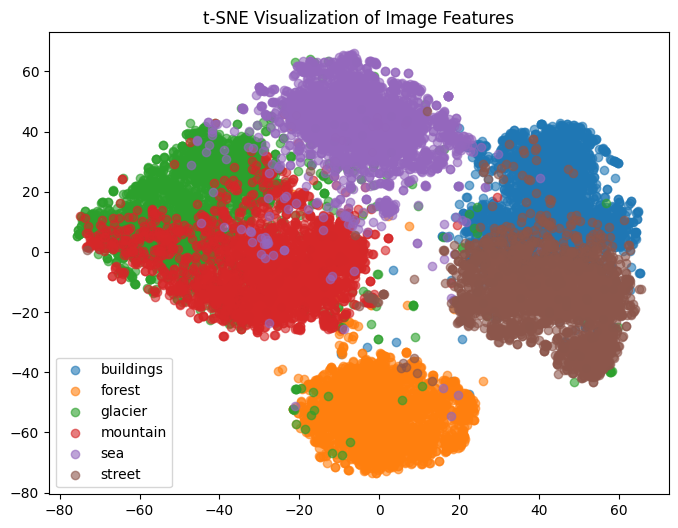

In [ ]:
from sklearn.manifold import TSNE

X = np.array(features)
y = np.array(labels)

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(8,6))
for label in np.unique(labels):
    idx = np.array(labels) == label
    plt.scatter(X_tsne[idx,0], X_tsne[idx,1], label=label, alpha=0.6)
plt.legend()
plt.title("t-SNE Visualization of Image Features")
plt.show()


In [ ]:
from sklearn.preprocessing import normalize
import pandas as pd
import numpy as np

# centroid per class
classes = np.unique(y)
centroids = []
for c in classes:
    centroids.append(X[y==c].mean(axis=0))
C = np.vstack(centroids)
Cn = normalize(C)

sim = np.dot(Cn, Cn.T)  # cosine similarity matrix
df_sim = pd.DataFrame(sim, index=classes, columns=classes)
print(df_sim)

           buildings    forest   glacier  mountain       sea    street
buildings   1.000000  0.678932  0.699923  0.700363  0.768499  0.944376
forest      0.678932  1.000000  0.732692  0.775117  0.665401  0.692664
glacier     0.699923  0.732692  1.000000  0.957713  0.855073  0.684611
mountain    0.700363  0.775117  0.957713  1.000000  0.814636  0.677569
sea         0.768499  0.665401  0.855073  0.814636  1.000000  0.730614
street      0.944376  0.692664  0.684611  0.677569  0.730614  1.000000


# Modeling

In [ ]:
import torch
import torchvision.models as models
import torchvision.transforms as T
from PIL import Image
import numpy as np
from torch.utils.data import Dataset

## Train-Test-Split

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["label"] = le.fit_transform(df["label"])

In [ ]:
class CustomImageDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df.reset_index(drop=True)
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = self.df.loc[idx, 'image_path']  # kolom path gambar
        label = self.df.loc[idx, 'label']
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label

In [ ]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

# --- 3. Transformasi untuk augmentasi ringan ---
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


In [ ]:
train_data = CustomImageDataset(train_df, transform=train_transform)
val_data = CustomImageDataset(val_df, transform=val_transform)

In [ ]:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32)

## Model Load & Definition

### Vis-Trans

In [ ]:
import torch
from transformers import pipeline

pipeline = pipeline(
    task="image-classification",
    model="google/vit-base-patch16-224",
    dtype=torch.float16,
    device=0
)
pipeline("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/pipeline-cat-chonk.jpeg")

### CNN-Based-Transfer Learning

In [ ]:
import torchvision.models as models

# --- 5. Model Transfer Learning ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet50(pretrained=True)
for param in model.parameters():
    param.requires_grad = False  # freeze backbone

# ganti classifier untuk jumlah kelas dataset kamu
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, df['label'].nunique())

model = model.to(device)

# --- 6. Loss & Optimizer ---
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=1e-4)

print("✅ DataLoader & model siap dilatih!")

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 198MB/s]


✅ DataLoader & model siap dilatih!


In [ ]:
num_epochs = 10  # bisa disesuaikan
best_val_acc = 0.0

for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for images, labels in train_loader:  # pastikan sudah ada DataLoader-nya
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader.dataset)
    train_acc = 100 * correct / total

    # --- evaluasi pada validation set ---
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_loss = val_loss / len(val_loader.dataset)
    val_acc = 100 * val_correct / val_total

    print(f"Epoch [{epoch+1}/{num_epochs}] | "
          f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}% | "
          f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}%")

    # simpan model terbaik
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), "best_resnet50_model.pth")

print("✅ Training selesai. Model terbaik disimpan sebagai 'best_resnet50_model.pth'.")

Epoch [1/10] | Train Loss: 0.9432 | Train Acc: 77.82% | Val Loss: 0.5352 | Val Acc: 88.21%
Epoch [2/10] | Train Loss: 0.4850 | Train Acc: 87.48% | Val Loss: 0.3908 | Val Acc: 88.64%
Epoch [3/10] | Train Loss: 0.3873 | Train Acc: 88.90% | Val Loss: 0.3325 | Val Acc: 89.92%
Epoch [4/10] | Train Loss: 0.3485 | Train Acc: 89.24% | Val Loss: 0.3044 | Val Acc: 90.02%
Epoch [5/10] | Train Loss: 0.3205 | Train Acc: 89.64% | Val Loss: 0.2861 | Val Acc: 90.74%
Epoch [6/10] | Train Loss: 0.3074 | Train Acc: 89.82% | Val Loss: 0.2766 | Val Acc: 90.95%
Epoch [7/10] | Train Loss: 0.2963 | Train Acc: 89.88% | Val Loss: 0.2772 | Val Acc: 90.63%
Epoch [8/10] | Train Loss: 0.2856 | Train Acc: 89.93% | Val Loss: 0.2705 | Val Acc: 91.02%
Epoch [9/10] | Train Loss: 0.2796 | Train Acc: 90.13% | Val Loss: 0.2571 | Val Acc: 91.34%
Epoch [10/10] | Train Loss: 0.2700 | Train Acc: 90.59% | Val Loss: 0.2527 | Val Acc: 91.24%
✅ Training selesai. Model terbaik disimpan sebagai 'best_resnet50_model.pth'.


# Evaluation

In [ ]:
# --- Siapkan device ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- Bangun ulang arsitektur model yang sama ---
model = models.resnet50(pretrained=False)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, df['label'].nunique())
model = model.to(device)

# --- Load bobot tersimpan ---
model.load_state_dict(torch.load("best_resnet50_model.pth", map_location=device))
model.eval()  # mode evaluasi (non-training)

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])


test_data = []
for i in os.listdir(test_base):
    class_path = os.path.join(test_base, i)
    for j in os.listdir(class_path):
      img_path = os.path.join(class_path, j)
      img = Image.open(img_path)
      test_data.append({
          "image_path": img_path,
          "label": i
      })


df_test = pd.DataFrame(test_data)


le = LabelEncoder()
df_test["label"] = le.fit_transform(df["label"])

test_data = CustomImageDataset(df_test, transform=test_transform)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

In [ ]:
model.eval()
predictions = []
true_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        predictions.extend(preds.cpu().numpy())
        true_labels.extend(labels.numpy())

In [ ]:
predictions =

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

true_labels_array = np.array(true_labels)
predictions_array = np.array(predictions)
target_names = [f'Class {i}' for i in range(len(np.unique(true_labels_array)))]

print("--- CLASSIFICATION REPORT ---")
print(classification_report(
    y_true=true_labels_array,
    y_pred=predictions_array,
    target_names=target_names
))


--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

     Class 0       0.91      0.92      0.92       437
     Class 1       1.00      0.99      0.99       474
     Class 2       0.87      0.82      0.85       553
     Class 3       0.84      0.85      0.84       525
     Class 4       0.91      0.96      0.94       510
     Class 5       0.93      0.92      0.93       501

    accuracy                           0.91      3000
   macro avg       0.91      0.91      0.91      3000
weighted avg       0.91      0.91      0.91      3000

